# U.S. Geological Survey Class GW3099
Advanced Modeling of Groundwater Flow (GW3099)\
Boise, Idaho\
September 16 - 20, 2024

![title](../../images/ClassLocation.jpg)

# GWT Example 3 -- Transport Modeling for Source Water Identification

This example is based on the MODFLOW 6 example described [here](https://modflow6-examples.readthedocs.io/en/master/_examples/ex-gwt-synthetic-valley.html) and modified from the jupyter notebook [here](https://modflow6-examples.readthedocs.io/en/master/_notebooks/ex-gwt-synthetic-valley.html).  

In the original version of this problem, which we start with here, the lake is assigned a fixed concentration of 1.0.  The GWT model simulates movement of this lake water through the model domain.  In this example, we use the GWT model and several variants of it, to identify the sources of water that comprise water that is extracted from the three pumping wells.

In [1]:
# imports
%matplotlib inline
import ex3
import flopy
import matplotlib.pyplot as plt
import numpy as np

silent = True

## Create and Run Flow Model

Create and run the flow model that was developed for Synthetic Valley.

In [2]:
sim_gwf = ex3.get_mf6gwf_sim(
    lake_concentration=1.0, recharge_concentration=0.0
)
sim_gwf.write_simulation(silent=silent)
sim_gwf.run_simulation(silent=silent)

Building mf6gwf model...flow


(True, [])

## Create and Run Transport Model

Create and run the transport model that was developed for Synthetic Valley.

In [3]:
sim_gwt = ex3.get_mf6gwt_sim(initial_concentration=0.0)
sim_gwt.write_simulation(silent=silent)
sim_gwt.run_simulation(silent=silent)

Building mf6gwt model...trans


(True, [])

## Plot Results

Plotting gwf model results...


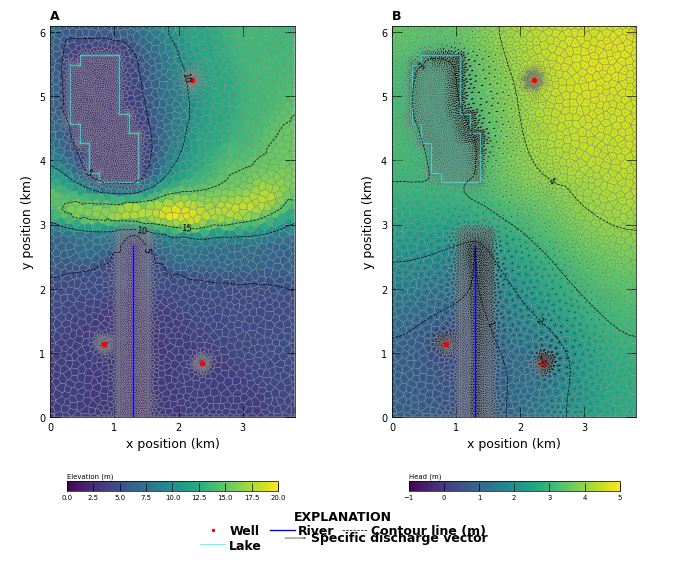

In [4]:
ex3.plot_head_results(sim_gwf)

Plotting gwt model results...


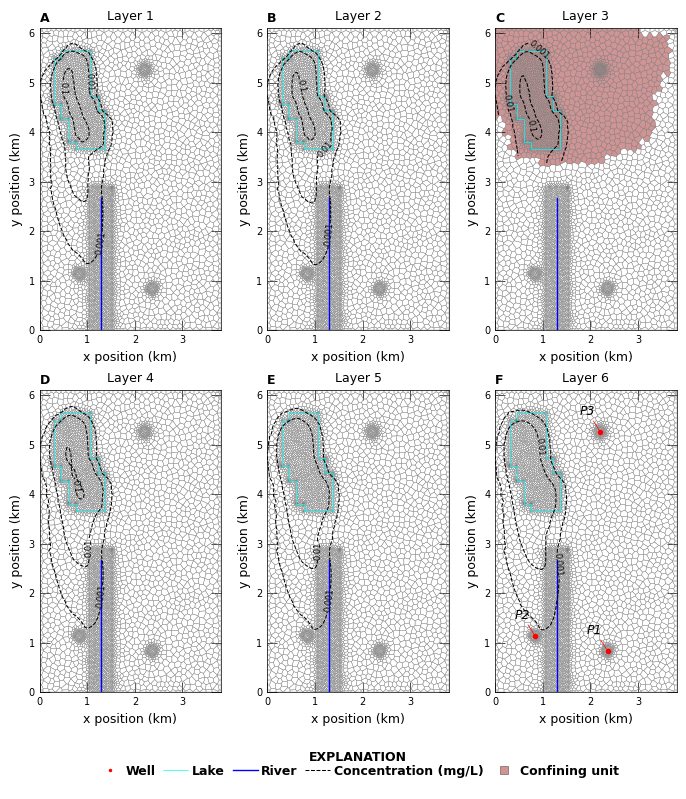

In [5]:
ex3.plot_conc_results(sim_gwt)

## Exercise

1.  In Synthetic Valley, there are three pumping wells that extract groundwater.  From the simulation results, can you determine, for each well, the fraction of the extracted water that comes from the lake?  Does this value change with time?
2.  What are the other sources of water to the wells?
3.  How can we use one or more solute transport models to show the source water fraction as a function of time for each of the three extraction wells?
4.  For each well, make a plot that shows the fraction of water from the different sources versus time.

In order to answer these questions, you will need concentrations in the three pumping wells as a function of time.  An observation package was added to the GWT model so that concentrations at the pumping well cells are saved to `trans.obs.csv` each time the model runs.  You can get back a numpy record array of the pumping well concentrations using the following:

```
well_concentrations = sim_gwt.trans.obs.output.obs().get_data()
```